<a href="https://colab.research.google.com/github/marco-scatassi/TLDR_text_summarization/blob/main/featureMatrixUndersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('drive/MyDrive/Unimib/Text_Mining')

In [ ]:
import pandas as pd
import numpy as np
import os
import text_summarization_utility as tsu
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset loading

In [ ]:
root_path = '/content/drive/MyDrive/Unimib/Text_Mining/Feature_matrices'

In [ ]:
trainAndVal = pd.read_csv('/'.join([root_path,'trainAndVal.csv'])).reset_index(drop=True)

In [ ]:
trainAndVal.shape

(24265857, 10)

In [ ]:
trainAndVal.head()

,document_index,sentence_relative_positions,word_in_sentence_relative,POS_tag_ratio_NOUN,POS_tag_ratio_VERB,POS_tag_ratio_ADJ,POS_tag_ratio_ADV,tf_isf_1_gram,sentence_similarity_1_gram,ext_labels
0,0,0.000000,0.012658,0.333333,0.333333,0.000000,0.333333,0.365453,0.052390,0
1,0,0.037037,0.033755,0.500000,0.250000,0.250000,0.000000,0.591205,0.084315,0
2,0,0.074074,0.025316,0.666667,0.000000,0.166667,0.000000,0.513191,0.074613,1
3,0,0.111111,0.016878,0.000000,0.000000,0.500000,0.500000,0.424720,0.044131,0
4,0,0.148148,0.016878,0.750000,0.000000,0.250000,0.000000,0.415305,0.062331,0


## Exploration

In [ ]:
features = trainAndVal.columns.delete([0,-1])
features

Index(['sentence_relative_positions', 'word_in_sentence_relative',
       'POS_tag_ratio_NOUN', 'POS_tag_ratio_VERB', 'POS_tag_ratio_ADJ',
       'POS_tag_ratio_ADV', 'tf_isf_1_gram', 'sentence_similarity_1_gram'],
      dtype='object')

In [ ]:
vc = trainAndVal['ext_labels'].value_counts()
print(f'proportion of summary sentencies: {vc[1]/vc[0]}')

proportion of summary sentencies: 0.11999016529667914


Text(0.5, 1.0, 'Non summary vs Summary sentences')

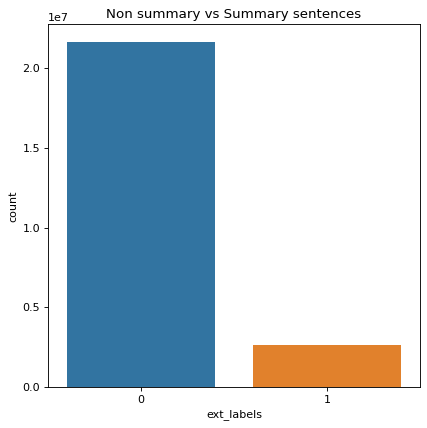

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi=80)
sns.countplot(x=trainAndVal['ext_labels'], ax=ax)
ax.set_title('Non summary vs Summary sentences')

Text(0.5, 1.0, 'Features BoxPlot')

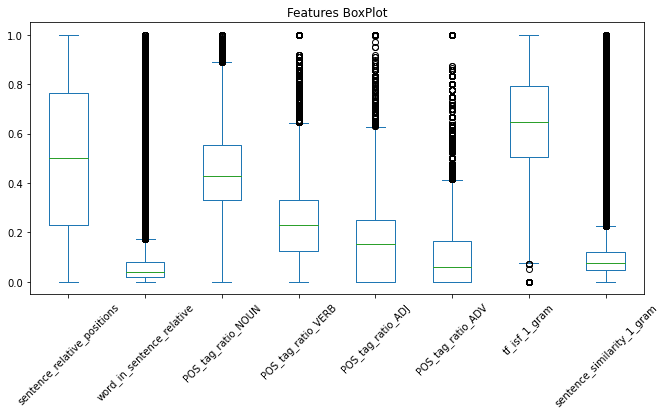

In [ ]:
trainAndVal[features].plot.box(figsize=(11,5), rot=45)
plt.title('Features BoxPlot')

Text(0.5, 0.98, 'Features distribution per type of sentence')

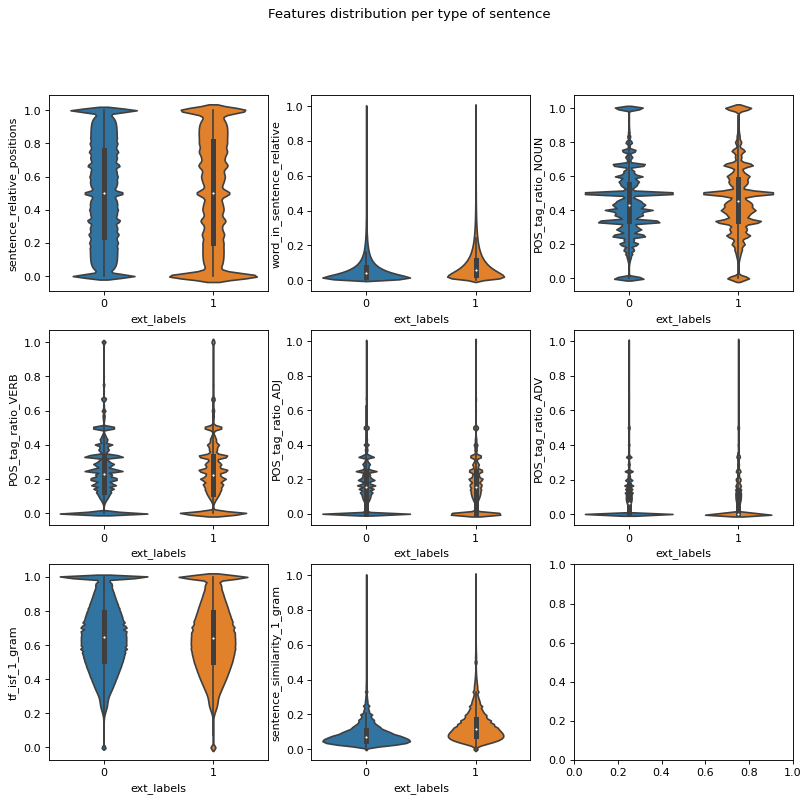

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 11), dpi=80)

for i in range(3):
  for j in range(3):
    if i != 2:
      sns.violinplot(data=trainAndVal, y=features[i*3+j], x='ext_labels', ax=ax[i,j])
    else:
      if j !=2:
        sns.violinplot(data=trainAndVal, y=features[i*3+j], x='ext_labels', ax=ax[i,j])

fig.suptitle('Features distribution per type of sentence')

Text(0.5, 1.0, 'Features correlation')

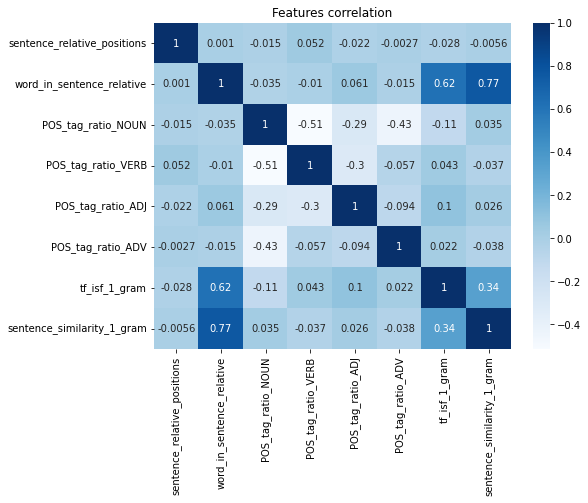

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
corr = trainAndVal[features].corr()
sns.heatmap(corr, cmap="Blues", annot=True, ax=ax)
plt.title('Features correlation')

# CUR undersampling

In [ ]:
trainAndValMinorityClass = trainAndVal[trainAndVal.ext_labels==1]
trainAndValMinorityClass.to_csv('/'.join([root_path,'trainAndValMinorityClass.csv']), index=False)

In [ ]:
trainAndValMajorityClass = trainAndVal[trainAndVal.ext_labels==0]

In [ ]:
int(len(trainAndValMajorityClass)/600)

36110

In [ ]:
trainAndValMajorityClassSplitted = []
l = int(len(trainAndValMajorityClass)/600)

for i in range(600):
  if i == 599:
    trainAndValMajorityClassSplitted.append(trainAndValMajorityClass.iloc[l*i:])
  else:
    trainAndValMajorityClassSplitted.append(trainAndValMajorityClass.iloc[l*i:l*(i+1)])

In [ ]:
features = trainAndValMajorityClass.columns.drop(['document_index'])
features

Index(['sentence_relative_positions', 'word_in_sentence_relative',
       'POS_tag_ratio_NOUN', 'POS_tag_ratio_VERB', 'POS_tag_ratio_ADJ',
       'POS_tag_ratio_ADV', 'tf_isf_1_gram', 'sentence_similarity_1_gram',
       'ext_labels'],
      dtype='object')

In [ ]:
trainAndValMajorityClassSplittedUndersampled = []

for i in range(len(trainAndValMajorityClassSplitted)):
  print(f'---------- {i} ------------')
  A, idx = tsu.CUR_undersampling(trainAndValMajorityClassSplitted[i].reset_index(), features, ratio = 0.6)
  trainAndValMajorityClassSplittedUndersampled.append(A)

pd.concat(trainAndValMajorityClassSplittedUndersampled).to_csv('/'.join([root_path,'trainAndValMajorityClassUndersampled.csv']), index=False)

---------- 0 ------------
reconstruction error 0.07093195050213161
Initial rows 36110
After sampling rows 19750
---------- 1 ------------
reconstruction error 0.07288268909965728
Initial rows 36110
After sampling rows 19789
---------- 2 ------------
reconstruction error 0.08428348225654804
Initial rows 36110
After sampling rows 19794
---------- 3 ------------
reconstruction error 0.07068301332054609
Initial rows 36110
After sampling rows 19726
---------- 4 ------------
reconstruction error 0.07234271986361641
Initial rows 36110
After sampling rows 19819
---------- 5 ------------
reconstruction error 0.06997779993069177
Initial rows 36110
After sampling rows 19784
---------- 6 ------------
reconstruction error 0.07100029867673593
Initial rows 36110
After sampling rows 19744
---------- 7 ------------
reconstruction error 0.070625844155554
Initial rows 36110
After sampling rows 19734
---------- 8 ------------
reconstruction error 0.07275503698224736
Initial rows 36110
After sampling rows 

## Error analysis

In [ ]:
rec_err = [0.07093195050213161,0.07288268909965728,0.08428348225654804,0.07068301332054609,0.07234271986361641,0.06997779993069177,0.07100029867673593,0.070625844155554,0.07275503698224736,0.07231483561848928,0.07644937962744479,0.07094641388522634,0.07025884942182355,0.07120655080675863,0.07175082676836597,0.07226759400218082,0.07034153517819561,0.07184944601438191,0.07202658501500024,0.07238898510163198,0.0721004365229604,0.07478456917852769,0.07067836866223223,0.07081012953744648,0.07242911904333449,0.0730259441657844,0.07324982277754143,0.07182558929724366,0.07219807279830365,0.06325759429356123,0.06152538519093214,0.06012257719077186,0.059824486922646185,0.06169023327626359,0.05953621486101552,0.05889127673927298,0.06050721052251718,0.061352987499100495,0.059262939745843055,0.0587511840047536,0.060479834970550574,0.07059559107294011,0.07154007849174163,0.07192205546823717,0.07133637332682606,0.0693433127882508,0.07080293887990798,0.07115226697266497,0.07247730318721318,0.07046401143623052,0.06940154051028123,0.07284347755813689,0.07022822659015332,0.07459441873570692,0.07010021565370017,0.07134461659550553,0.07015369439793961,0.07150553335265797,0.0699455250690889,0.0700386467791568,0.07006284533828132,0.06911327934129892,0.07096812112198517,0.07078222594988434,0.07066997803723211,0.07132195906305908,0.07080848451191261,0.0709274291416079,0.07076935377219004,0.07111992475462549,0.07034700149613927,0.06982082837033875,0.0725678967917072,0.07176942441753059,0.07022800480121436,0.07083911392917494,0.07192770801755458,0.07114005055103037,0.07102438862209337,0.07119537722002894,0.07059342772378423,0.06153056667938701,0.06172243897500809,0.05977972274922216,0.060932496271941,0.05985803971889768,0.06247476361502572,0.05736711086050805,0.06086946921455969,0.059428306554371924,0.06049978704290658,0.06006943350260036,0.06091355521751577,0.05908476863309659,0.06116457953322528,0.06099018366492295,0.06189436438494367,0.06088815236467511,0.05856559673331972,0.060512521960848390,0.061109723988685931,0.0619464350689064442,0.058200535101543953,0.0614421260277073364,0.082316600697251795,0.070449192677347876,0.072961533361298077,0.071389087268587498,0.072283634240653699,0.06979873903955170,0.069838717588954481,0.069487893308431122,0.071192512892987633,0.070624256218359954,0.071242829392630825,0.071201368671320796,0.068914089853968097,0.069271370410678568,0.070752231328786269,0.071282499403103720,0.070444736128037191,0.071195886847838662,0.069653981121648063,0.070902772497664684,0.071135965052396655,0.071186494131553956,0.071101590702144097,0.070034283675594148,0.070196406903720789,0.072660632355155090,0.072579846498208561,0.070749665028536042,0.069915757531626213,0.071822854762006624,0.073213466388270275,0.070185534804568816,0.07106394496268427,0.07013236241203778,0.070465107961205669,0.069374120658307990,0.072093140367391731,0.070698401115110462,0.07108760733053613,0.06992542445256574,0.071149015754640485,0.071589006276010896,0.071510697931529557,0.07175850459295838,0.07123870030241759,0.072953409764456220,0.073374692317249731,0.071696384203580342,0.071484219606708133,0.070526874172614274,0.072868609697699265,0.071150838834981266,0.069975710317279937,0.071780079836481268,0.066594759788449819,0.069423087647861230,0.069745423268862461,0.07128629108645292,0.071923318889262393,0.071511731694178324,0.071425298991699545,0.071234660325016136,0.071207715346146827,0.071131065423955538,0.071056598922988859,0.070989064945103820,0.072860051062452291,0.071680562539533282,0.070649987428744073,0.071257870766214364,0.07059180877446215,0.070132969902007516,0.071658300326161737,0.071122436337500878,0.070586969308243179,0.071288520040728260,0.070393649832086821,0.071116535203912692,0.071302212365605443,0.071856556146166824,0.07182119901447635,0.070818593239512316,0.07036717917172267,0.072363964114580248,0.071766905450458029,0.070101071404096980,0.072028731367591641,0.071393288472230962,0.070994107893558663,0.07129678866623354,0.072993680278317225,0.06964792996106236,0.070164504033495217,0.069849382962845218,0.076277943785474629,0.068818531095627590,0.07008790186410671,0.07096083357732912,0.072824080511726233,0.09276425982461524,0.071055979090571825,0.071328438774418526,0.069348575495944637,0.072101129601334478,0.07285344390455229,0.072385918368932240,0.071011588211388671,0.07266817890568972,0.071308679979850463,0.072636163221900564,0.069303738114592335,0.07086336689876766,0.071254071852125467,0.072326391198113028,0.070125070309839979,0.072348743666424130,0.072061346428811681,0.072251170265389312,0.07217370366811493,0.071052996100891654,0.070485391587129915,0.068877729135199756,0.070209228391200687,0.069479044470721178,0.07158230445827839,0.070623514926936860,0.071767929521595941,0.072590424903221762,0.072327902516556213,0.071773246079689684,0.07777638635677145,0.07252359626711766,0.071548396093569767,0.070279860442622048,0.069442287261561149,0.071996517466092740,0.07047762680894541,0.071935904217084722,0.070222943400138583,0.071506518513404344,0.071874501415592355,0.072531109099235746,0.073310831175529297,0.071141864374472878,0.070729639366879919,0.070904943879496680,0.070185444626031131,0.071060596339173722,0.071304720538594463,0.069600689683194594,0.07128057347609855,0.071069894671213416,0.070204468641669247,0.072874289772951078,0.071218910595160719,0.071280888387088070,0.070907059254985831,0.071679537713291982,0.071001328344197833,0.069018296469843054,0.070000530129977985,0.071033122861399256,0.069901194531017427,0.072005540880981978,0.072805224259233619,0.070291602152435860,0.070875763018059491,0.071398903244040432,0.071241861927842643,0.071852613726086414,0.071170712179921715,0.072821254202366286,0.072716149369362467,0.069493281135955258,0.071250141964441329,0.070456376415086970,0.071738336404125521,0.072691502603273712,0.069900906567808173,0.070115903488885024,0.073260909028771055,0.072578521254663166,0.073129236146519987,0.07332406797532488,0.073930526544826189,0.071716205286870880,0.074907959742729551,0.073016735100693262,0.072138362592629433,0.072460540433097664,0.073375945720495385,0.070961620066482786,0.072532086216748127,0.07029226546604258,0.07265804979059739,0.072990019007925760,0.07078813596925611,0.071355505628265152,0.070862885817888083,0.070673002894443964,0.073401635921735065,0.072148564561936946,0.0701160449041117,0.073628060142679928,0.073911374667191649,0.072093604516933420,0.073244569023853331,0.072021791795145442,0.073737240129334983,0.072468698551700344,0.074512446914190765,0.071940901590968116,0.072898000549311777,0.071637289026696738,0.07388482178558739,0.072619247442987170,0.07331430631147431,0.072450566118870312,0.072325053895517693,0.071045820101174544,0.070661120941310915,0.070410122424444646,0.072203539180828397,0.070759254610095018,0.072292787791998929,0.070086986806909270,0.071866506308395491,0.071014925338591182,0.071264618253448723,0.07209477107004484,0.07296178097438395,0.072741593496142296,0.074905329619777937,0.071475853502755458,0.072659533058868429,0.071619549623296570,0.072120646844899411,0.070766090942413532,0.072428498904375393,0.071735762790659554,0.072326755444485265,0.071392270168434116,0.073147822184602787,0.072856706052958068,0.073256445668779919,0.070667755352845790,0.073792899111656941,0.070748670304314552,0.072902803835198623,0.072514127610297574,0.07122376664097815,0.073128658055880736,0.072740434167008237,0.072748056158621058,0.073002642086484319,0.071180377715876430,0.072378213287407771,0.069872439300302042,0.072928487417998333,0.071233513539064494,0.070108803234590075,0.071296120280151236,0.07171212784236687,0.071617738294776588,0.071299820812719899,0.072671708501954020,0.070708569618754261,0.070306859434028852,0.07237507417754723,0.083848047274603614,0.082923481452394745,0.083583724982776336,0.08323863045747037,0.085539347941963688,0.082739065941126739,0.10502168302286130,0.084522720103156781,0.084640359807531682,0.077455448208233333,0.070896994094294584,0.072285942689875545,0.069239100107808576,0.071957856655924337,0.071016738964579118,0.069034146224142329,0.072384564538543740,0.071062842108335541,0.07220869291315272,0.072245416316406133,0.076655074902065814,0.072117252397646165,0.071901457464852916,0.072421960433793417,0.073847355851459968,0.072276794536678859,0.073278303473636240,0.07132630875610041,0.071829883162977522,0.073148949592741253,0.072468733722007354,0.071473848512834495,0.071510218170279856,0.0725082264654817,0.072705358678418928,0.071760550072579649,0.070189640595943790,0.070216593272173781,0.070929425697591682,0.070564798804597643,0.069764500824426164,0.072362167097444495,0.070956809794146526,0.071212858037925967,0.070887001715514218,0.071870184885782449,0.072024159542254810,0.070305953803972821,0.070339517869455252,0.071516100911403733,0.0726101504305384,0.071531066317533785,0.071442200481868716,0.071778728276280127,0.071346303812853248,0.07397515362424449,0.071803384861547160,0.071917597928642291,0.070889791304346622,0.07154587570780763,0.070926455839262554,0.071705335196856825,0.071405917630277336,0.071280253970105047,0.070907183775815858,0.074086837598032679,0.070564093101301160,0.070788888587909421,0.070809352682949372,0.071016999536903263,0.070396991624886734,0.069509086283511095,0.07194346793124696,0.069628232867873297,0.069791982010037958,0.07161557661575089,0.070562019419199170,0.071089370600956871,0.072412486486098282,0.069685701784377933,0.069895642872196324,0.072652009155433455,0.071883681537324446,0.073176399418083337,0.069808743188385268,0.071049893411697039,0.071321244921263880,0.071453107991946031,0.072497327372600962,0.071466431120542783,0.071209313712288924,0.071079837275981625,0.071979370843529286,0.073338757188597457,0.071511825796905748,0.071559831229651459,0.070952047957540650,0.07265856968675141,0.071126640633650512,0.070306975999203813,0.070220055934285144,0.071058013000897885,0.071626904158751286,0.07392956943523297,0.072592590329337758,0.071590524452850279,0.07048252898463070,0.07297951500358941,0.073602084774834432,0.071658857915627873,0.072259441468092384,0.072328826830598145,0.071609543634078336,0.070117395472085567,0.070936877397921838,0.070018236842043659,0.071742374793755140,0.073067913752793371,0.072958697016767332,0.071406299969576333,0.071282259722605094,0.071810674186969945,0.073351748742318026,0.069571804542791317,0.074110623214250998,0.072309484558749019,0.0728034212790320,0.069437473102197761,0.073358345081555612,0.071097255559886663,0.07345690806553884,0.07076434340450055,0.070389500879917696,0.079144354177201467,0.069965598766639558,0.071062955177362619,0.072591598939610440,0.073280569602861211,0.072067236234797562,0.070999712374085483,0.072573295317170554,0.072526998926996895,0.072829859126248546,0.070436876406290547,0.071722112919651578,0.072286429151630789,0.071302247790109850,0.071184634675628331,0.073219232814546312,0.071777049511485683,0.131690384125221474,0.072753013416871785,0.070238115538785846,0.070504590166954037,0.072134364891355798,0.071258110420615649,0.071820547750699570,0.069513027623788571,0.072164672491166012,0.071432393573194773,0.072155568468384564,0.071347872052129575,0.07082277922221556,0.071819061066581887,0.071572120667951028,0.072019525101596989,0.073122619229332620,0.071447073470583471,0.071915546595382962,0.071317557509483573,0.072683894150347014,0.071742936977899855,0.072754511953103996,0.131260237003771487,0.073306169338314668,0.070897766903262089,0.071263079006470460,0.07204644408247011,0.088781397168792952,0.072186179426278723,0.071592102760588564,0.071317469775955435,0.072117461281314056,0.071369027366327077,0.070813238099700038,0.071245202901458289,0.07137720224406770,0.071744094568631,0.071445318806550832,0.070155737973606233,0.071587722097590694,0.078418523728685415,0.071572604405124996,0.070875087895175987,0.071975502385744478,0.070861196695407579,0.072995357580475290,0.071579221965519681,0.072235538736122122,0.071099776138705633,0.072415130416912394,0.07251557329488245,0.068944390884339156,0.070945192764114227,0.072800717804409858,0.069720373961268449,0.07234698607719750,0.071558556670942841,0.07223418842670462,0.074002988240369913,0.072345975819822094,0.07150179655170175,0.071633980516530176,0.070139025863324257,0.071747387287777948,0.070192762314144139,0.07045505147552810,0.072540732356679861,0.073243846184301382,0.071190507375485063,0.069866119424280614,0.070717513533935865,0.070449946671976326,0.069969433710311477,0.071534555520620828,0.072018186815771959,0.06170475677265022]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'relative error')

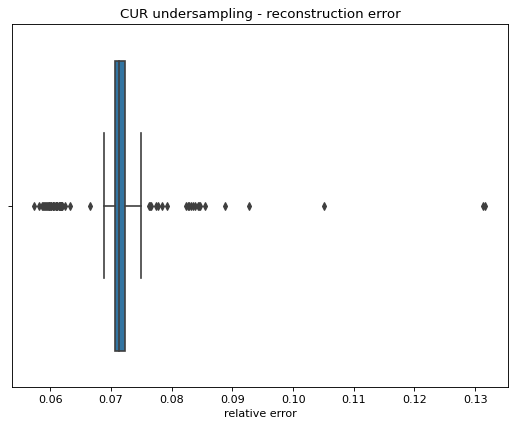

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=80)
sns.boxplot(rec_err, ax=ax)
ax.set_title('CUR undersampling - reconstruction error')
ax.set_xlabel('relative error')